<a href="https://colab.research.google.com/github/YunChenLi/Tensorflow-Notebook/blob/main/01_tensorflow_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression witth Neural networks in TensorFlow

what this topic mis mainly for?

- Architecture of a neural network regression model
- Input shapes and output shapes of a regression model(features and laabels)
- Creating custom data to view and fit
- Steps in modelling 
  - Creating a model, compiling a model, fitting a model, evaluating a model
- Different evaluation methods 
- Saving and loading models


In [ ]:
import tensorflow as tf  

A = tf.constant([[0,0,0,1],
                 [0,1,0,0],
                 [0,1,0,0]])
A.shape # difference between input and output shape  


TensorShape([3, 4])

In [ ]:

import tensorflow as tf
print(tf.__version__)

2.5.0


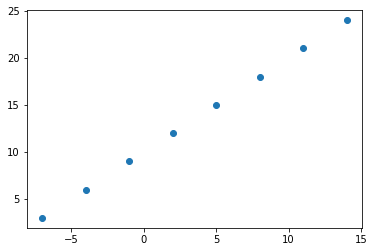

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 
# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
Y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X, Y)

In [ ]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shape

In [ ]:
# Create a demo tenssor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"]) 
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], Y[0]

(-7.0, 3.0)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# Turn out numpy array into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling aa model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find the patterns between X and Y(features and labels).  

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# same as above
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(X, Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 240ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction with our trying model
y_pred = model.predict([17.0])

In [ ]:
# Improving our model
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(X, Y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 239ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 3

In [ ]:
# Try and make a prediction with our trying model
y_pred = model.predict([17.0])
y_pred

array([[30.158512]], dtype=float32)

In [ ]:
# Improving our model(with extra hidden layers)
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(X, Y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 324ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7696 - mae: 11.7696
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2132 - mae: 11.2132
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6444 - mae: 10.6444
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0534 - mae: 10.0534
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 9.4344 - mae: 9.4344
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7821 - mae: 8.7821
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.0881 - mae: 8.0881
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3552 - mae: 7.3552
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 6.5787 - mae: 6.5787
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - 

In [ ]:
y_pred = model.predict([17.0])
y_pred

array([[31.38265]], dtype=float32)

In [ ]:
# Improving our model(with extra hidden layers)
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation = None),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Fit model (this time we'll train for longer)
model.fit(X, Y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 362ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7017 - mae: 12.7017
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.2185 - mae: 12.2185
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7299 - mae: 11.7299
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2333 - mae: 11.2333
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7262 - mae: 10.7262
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2060 - mae: 10.2060
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 9.6700 - mae: 9.6700
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 9.1155 - mae: 9.1155
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 8.5396 - mae: 8.5396
Epoch 11/100
1/1 [==============================] - 0s 5ms/step

In [ ]:
y_pred = model.predict([17.0])
y_pred

array([[29.787045]], dtype=float32)

In [ ]:
# Improving our model(with extra hidden layers)
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation = None),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
# Fit model (this time we'll train for longer)
model.fit(X, Y, epochs=100) # train for 100 epochs not 10

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 307ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.5071 - mae: 12.5071
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.8279 - mae: 11.8279
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1425 - mae: 11.1425
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4485 - mae: 10.4485
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7427 - mae: 9.7427
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0218 - mae: 9.0218
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2826 - mae: 8.2826
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.5221 - mae: 7.5221
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 6.7841 - mae: 6.7841
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - l

In [ ]:
y_pred = model.predict([17.0])
y_pred

array([[27.216782]], dtype=float32)

# Evaluating a model

In [ ]:
X = np.arange(-100, 100, 4)
Y = np.arange(-90, 110, 4)
Y = X + 10
X, Y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
Y_train = Y[:40]

X_test = X[40:] # last 10 examples (20% of data)
Y_test = Y[40:]

len(X_train), len(X_test)

(40, 10)

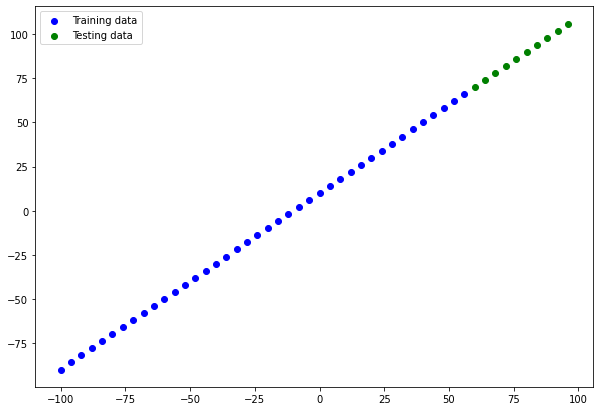

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, Y_train, c = "b", label = "Training data")
plt.scatter(X_test, Y_test, c = "g", label = "Testing data")
plt.legend()

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10
                        ),
  tf.keras.layers.Dense(1, name = "output_layer")
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
model.fit(X_train, Y_train, epochs=100) # commented out on purpose (not fitting it just yet)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 3ms/

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.build()

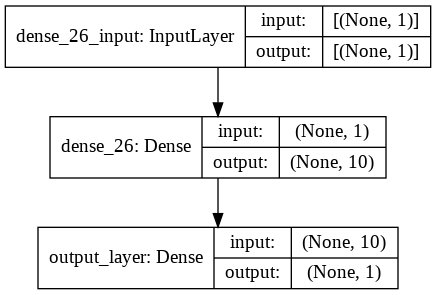

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes=True
           )

#Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the truth labels.

In [ ]:
# Make some predictions
Y_pred = model.predict(X_test)
Y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
Y_test, Y_pred

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32))

In [ ]:
# Let's plot function

def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions= Y_pred):
  plt.figure(figsize=(10, 10))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
  plt.scatter(test_data, Y_pred, c="r", label="Predictions")
  plt.legend()

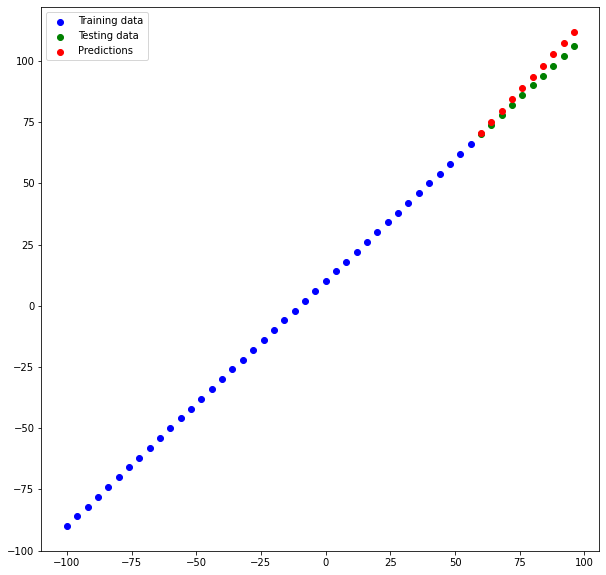

In [ ]:
plot_predictions()

### Evaluationg our model's prediction with regtression evaluation matrics

MAE - mean absolute error

MSE - mean square error



In [ ]:
# Evaluate the model 
model.evaluate(X_test, Y_test)

NameError: ignored

In [ ]:
Y_pred, Y_test

NameError: ignored

In [ ]:
# Calculate MAE
tf.metrics.mean_absolute_error(tf.constant(Y_test), tf.squeeze(Y_pred))

In [ ]:
tf.constant(Y_pred). #squeeze the y_pred (reshaping) by tf.squeeze

In [ ]:
# Calculate the MSE
tf.metrics.mean_squared_error(Y_test, tf.squeeze(Y_pred))

In [ ]:
# MSE would be typically larger than MAE
mae = tf.metrics.mean_absolute_error(tf.constant(Y_test), tf.squeeze(Y_pred))
mse = tf.metrics.mean_squared_error(Y_test, tf.squeeze(Y_pred))
mae, mse, mae < mse

### Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.
Again, there are many different ways you can do this, but 3 of the main ones are:
Get more data - get more examples for your model to train on (more opportunities to learn patterns).
Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
Train for longer - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.
So let's take a look at how we can improve our model using 2 and 3.
To do so, we'll build 3 models and compare their results:
- model_1 - same as original model, 1 layer, trained for 100 epochs.
- model_2 - 2 layers, trained for 100 epochs.
- model_3 - 2 layers, trained for 500 epochs.

In [ ]:
# Make some functions to reuse mae and mse
def mae(Y_test, Y_pred):
  return tf.metrics.mean_absolute_error(tf.constant(Y_test), tf.squeeze(Y_pred))

def mse(Y_test, Y_pred):
  return tf.metrics.mean_squared_error(Y_test, tf.squeeze(Y_pred))

# Running experiments to improve models


In [ ]:
# model_1

# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(X_train, Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

In [ ]:
Y_preds_1 = model1_1.predict(X_test)
plot_predictions(predictions=Y_preds_1)

NameError: ignored

In [ ]:
import tensorflow as tf
import numpy as np


# Calculate model_1 metrics
mae_1 = mae(Y_test, Y_preds_1.squeeze()).numpy()
mse_1 = mse(Y_test, Y_preds_1.squeeze()).numpy()
mae_1, mse_1 

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes= True)